In [9]:
import sys
print(f"Python version: {sys.version}")
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

Python version: 3.9.4 (tags/v3.9.4:1f2e308, Apr  6 2021, 13:40:21) [MSC v.1928 64 bit (AMD64)]


In [10]:
xtrain_path = 'xtrain.csv'
xtest_path = 'xtest.csv'
ytrain_path = 'ytrain.csv'
ytest_path = 'ytest.csv'
xtrain = pd.read_csv(xtrain_path)
xtest = pd.read_csv(xtest_path)
ytrain = pd.read_csv(ytrain_path)
ytest = pd.read_csv(ytest_path)

X_train = xtrain.to_numpy()
X_test = xtest.to_numpy()
Y_train = ytrain.to_numpy()
Y_test = ytest.to_numpy()

In [11]:
model = Sequential([
    Dense(236, activation='relu', input_shape=(8,)), #  Dropout(0.5),
    Dense(380, activation='relu', ),
    Dense(4, activation='linear', )
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=4.07e-4), loss='mse')

In [18]:
history = model.fit(X_train, Y_train, epochs=200, batch_size=8, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/200
263/263 [==============================] - 1s 3ms/step - loss: 3.8816e-07 - val_loss: 5.5498e-07
Epoch 2/200
263/263 [==============================] - 1s 2ms/step - loss: 3.0401e-07 - val_loss: 3.9312e-07
Epoch 3/200
263/263 [==============================] - 1s 2ms/step - loss: 2.8328e-07 - val_loss: 4.9058e-07
Epoch 4/200
263/263 [==============================] - 1s 4ms/step - loss: 3.3643e-07 - val_loss: 6.3230e-07
Epoch 5/200
263/263 [==============================] - 1s 3ms/step - loss: 3.9492e-07 - val_loss: 6.7435e-07
Epoch 6/200
263/263 [==============================] - 1s 3ms/step - loss: 4.8123e-07 - val_loss: 9.4746e-07
Epoch 7/200
263/263 [==============================] - 1s 3ms/step - loss: 4.1018e-07 - val_loss: 1.1564e-06
Epoch 8/200
263/263 [==============================] - 1s 3ms/step - loss: 4.0320e-07 - val_loss: 4.4698e-07
Epoch 9/200
263/263 [==============================] - 1s 3ms/step - loss: 3.2349e-07 - val_loss: 6.1712e-07
Epoch 10/200
263/26

In [19]:
model.fit(X_train, Y_train, epochs=1, batch_size=8, verbose=1, validation_data=(X_test, Y_test))

263/263 [==============================] - 1s 3ms/step - loss: 2.1271e-07 - val_loss: 3.5626e-07


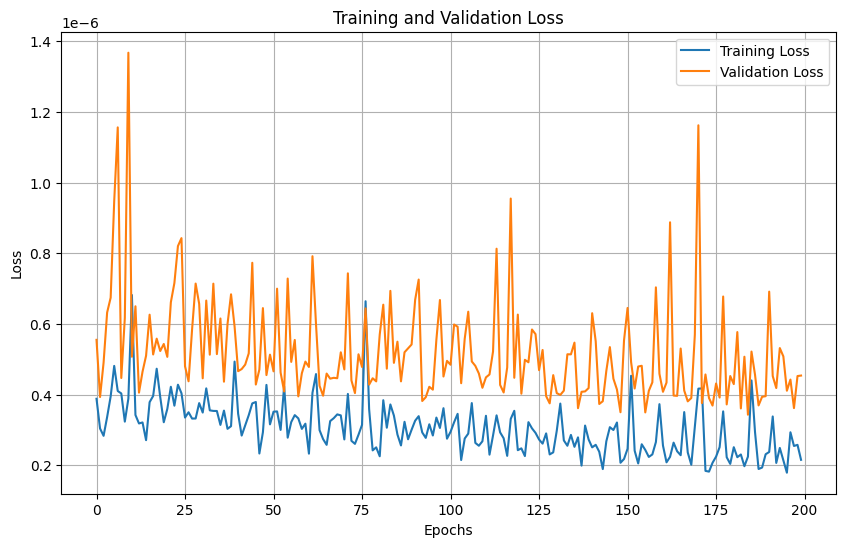

In [20]:
import matplotlib.pyplot as plt

# Extract loss values
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
y_train_pred_scaled = model.predict(X_train)
y_test_pred_scaled = model.predict(X_test)

29/29 [==============================] - 0s 1ms/step


In [22]:
mae_train = mean_absolute_error(ytrain, y_train_pred_scaled)
mse_train = mean_squared_error(ytrain, y_train_pred_scaled)
mape_train = np.mean(np.abs((ytrain - y_train_pred_scaled) / ytrain)) * 100
rmse_train = np.sqrt(mse_train)
rmspe_train = np.sqrt(np.mean(np.square((ytrain - y_train_pred_scaled) / ytrain))) * 100 
r2_train = r2_score(ytrain, y_train_pred_scaled)

mae_test = mean_absolute_error(ytest, y_test_pred_scaled)
mape_test = np.mean(np.abs((ytest - y_test_pred_scaled) / ytest)) * 100
mse_test = mean_squared_error(ytest, y_test_pred_scaled)
rmse_test = np.sqrt(mse_test)
rmspe_test = np.sqrt(np.mean(np.square((ytest - y_test_pred_scaled) / ytest))) * 100 
r2_test = r2_score(ytest, y_test_pred_scaled)

# Print results
print(f"Training Metrics:")
print(f"MAE: {mae_train:.4f}, MAPE: {mape_train:.4f}, MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, RMSPE: {rmspe_train:.4f}, R2: {r2_train:.4f}")

print(f"Test Metrics:")
print(f"MAE: {mae_test:.4f}, MAPE: {mape_test:.4f}, MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, RMSPE: {rmspe_test:.4f}, R2: {r2_test:.4f}")

Training Metrics:
MAE: 0.0003, MAPE: 0.1188, MSE: 0.0000, RMSE: 0.0004, RMSPE: 0.1483, R2: 0.9921
Test Metrics:
MAE: 0.0005, MAPE: 0.1847, MSE: 0.0000, RMSE: 0.0006, RMSPE: 0.2382, R2: 0.9808


In [29]:
# Combine X_test, Y_test, and Y_test_pred into a single DataFrame
data = np.hstack((xtest, ytest.iloc[:,0].values.reshape(-1,1), y_test_pred_scaled[:,0].reshape(-1,1)))
columns = [f"x{i+1}" for i in range(X_test.shape[1])] + ["y_test", "y_test_pred"]

# Create a DataFrame
df = pd.DataFrame(data, columns=columns)

# Export the DataFrame to a CSV file
output_file = "FNN_predictions.csv"
df.to_csv(output_file, index=False)

print(f"Predictions exported to {output_file}")

Predictions exported to FNN_predictions.csv
